# Equation of State using Generalized van der Waals Theory

This notebook illustrates the generalized van der Waals theory (gvdW) for the equation of state for interacting particles. Based on the lecture notes, _Properties of Molecular Fluids in Equilibrium_ by Sture Nordholm.

In [1]:
from __future__ import division, unicode_literals, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import inspect
from scipy.integrate import quad
from ipywidgets import interact
from math import sqrt, pi
plt.rcParams.update({'font.size': 16, 'figure.figsize': [8.0, 6.0]})

### Pair potentials

The particles are here assumed to interact via a Lennard-Jones and a screened Coulomb potential,

$$
\beta w(r) = \frac{\lambda_B z^2}{r} e^{-r/\lambda_D}
+ 4\beta \varepsilon_{LJ} \left ( \left ( \frac{\sigma}{r}\right )^{12} - \left ( \frac{\sigma}{r}\right )^{6}\right )
$$

where $\lambda_B$ and $\lambda_D$ are the Bjerrum and Debye lengths, respectively.
Any potential may in principle be given and must return the energy in units of $k_BT$.

In [2]:
# Debye-Huckel
def wDH(r, z, D):
    lB = 7.0 # Bjerrum length, angstroms
    return lB * z**2 * np.exp(-r/D) / r

# Lennard-Jones
def wLJ(r, eps, sigma):
    return 4 * eps * ( (sigma/r)**12 - (sigma/r)**6 )

# Total potential
def w(r, z, D, eps, sigma):
    return wDH(r, z, D) + wLJ(r, eps, sigma)

### Interaction parameter

Here we integrate the above pair potential to get the average interaction energy per particle, assuming that the pair correlation function, $g(r)$, can be described by a simple step function, zero when $r<\sigma$, unity otherwise:
$$ 
\hat{a} = -\frac{1}{2} \int_{\sigma}^{\infty} 4\pi w(r) r^2 dr
$$

In this Notebook we simply do the integration numerically so that we can use arbitrary pair potentials.
From this we calculate the pressure, $p$, versus density, $n$, using,

$$
\beta p_{gvdW} = \frac{1}{v-v_0} - \frac{\hat{a}}{v^2}
$$

where $v=1/n$ and $v_0=2\pi\sigma^3/3$ is the particle volume.
For reference we'll also plot EOS for an ideal system (van 't Hoff), $\beta p_{ideal}=n$,
where $\beta = 1/k_BT$.

In [3]:
def ahat(potential, **parameters):
    sigma = parameters['sigma']
    # extract the relevant parameters for the potential
    parameters = {k:v for k,v in parameters.items() if k in inspect.signature(potential).parameters}
    
    def integrand(r):
        return potential(r, **parameters) * r**2
    integral, error = quad(integrand, sigma, np.infty, limit=50)
    return -2 * pi * integral


def ahatexact(z, D, eps, sigma):
    return -2 * pi * (-8/9 * eps * sigma**3 + 7 * np.exp(-sigma/D) * z**2 * (D + sigma))

def Pideal(n):
    return n

def Pgvdw(n, z, D, eps, sigma, potential=w):
    v0 = 2*pi*sigma**3 / 3
    v  = 1 / n
    a = ahat(potential, z=z, D=D, eps=eps, sigma=sigma)
    return 1/(v-v0) - a/v**2

### Interactive EOS plot

In [5]:
interact??

In [7]:
repr(i.widget)

'<ipywidgets.widgets.widget_box.Box object at 0x10be80518>'

In [28]:
import ipywidgets

In [34]:
from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider, VBox, HBox

label_layout = Layout()

form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)

form_items = [
    Box([Label(value='Age of the captain'), IntSlider(min=40, max=60)], layout=form_item_layout),
    Box([Label(value='Egg style'),
         Dropdown(options=['Scrambled', 'Sunny side up', 'Over easy'])], layout=form_item_layout),
    Box([Label(value='Ship size'),
         FloatText()], layout=form_item_layout),
    Box([Label(value='Information'),
         Textarea()], layout=form_item_layout)
]

form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    border='solid 2px',
    align_items='stretch',
    width='50%'
))
form

def interactivex(potentials: dict, variables: dict):
    def graph(**kwargs):
        return kwargs
    
    potentials_box = ipywidgets.interactive({potential: True for potential in potentials})
    variables_box = ipywidgets.interactive(variables)
    return

In [31]:
z = interactivex(
    potentials={"Combined": w, "Lennard-Jones": wLJ, "Debye-Huckel": wDH},
    variables={"eps":(0.0, 10.0, 0.1),
               "sigma":(0, 5, 0.1),
               "z":(0.0, 10, 1.0), 
               "Cs":(1e-3, 1.0, 0.1)}
)

In [32]:
type(z)

ipywidgets.widgets.widget_box.Box

In [33]:
z.children

(<ipywidgets.widgets.widget_bool.Checkbox at 0x10fcdb710>,
 <ipywidgets.widgets.widget_float.FloatSlider at 0x10fe87588>)

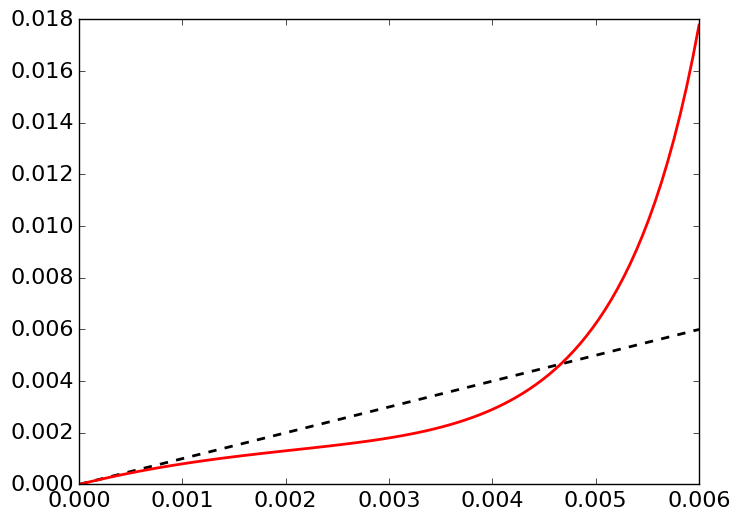

In [4]:
def plot_EOS( eps=1.0, sigma=4.0, z=0.0, Cs=0.3, potential=w):
    D = 3.04/sqrt(Cs)
    plt.plot(n, Pideal(n),  'k--', label='ideal', lw=2)
    plt.plot(n, Pgvdw(n, z, D, eps, sigma, potential=potential),  'r-', label='gvdW', lw=2)

n = np.linspace(1e-7, 6e-3, 100)
    
i = interact(plot_EOS,
             eps=(0.0, 10.0, 0.1), 
             sigma=(0, 5, 0.1), 
             z=(0.0, 10, 1.0), 
             Cs=(1e-3, 1.0, 0.1), 
             potential = {"Combined": w, "Lennard-Jones": wLJ, "Debye-Huckel": wDH} )

plt.title('Equation of State')
plt.xlabel(r'Number density, $n$')
plt.ylabel(r'Pressure, $\beta p$')
plt.legend(loc=0, frameon=False)
 
i.widget.children[0].description=r'$\beta\varepsilon_{LJ}$'
i.widget.children[1].description=r'$\sigma_{LJ}$'
i.widget.children[2].description=r'$z$'
i.widget.children[3].description=r'$c_s$ (M)'

In [9]:
from ipywidgets import FloatSlider

In [10]:
x_widget = FloatSlider(min=0.0, max=10.0, step=0.05)
y_widget = FloatSlider(min=0.5, max=10.0, step=0.05, value=5.0)

def update_x_range(*args):
    x_widget.max = 2.0 * y_widget.value
y_widget.observe(update_x_range, 'value')

def printer(x, y):
    print(x, y)
interact(printer,x=x_widget, y=y_widget)

1.0 1.65


In [11]:
f = FloatSlider(min=0, max=10, step=1)

In [19]:
f.visible = True

In [14]:
f